In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sub=pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [5]:
train.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [6]:
train["Heart Disease"].value_counts()

Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

In [7]:
train["Heart Disease"]=train["Heart Disease"].replace({"Absence":0,"Presence":1})

C:\Users\Ainvio\AppData\Local\Temp\ipykernel_3436\873581592.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["Heart Disease"]=train["Heart Disease"].replace({"Absence":0,"Presence":1})


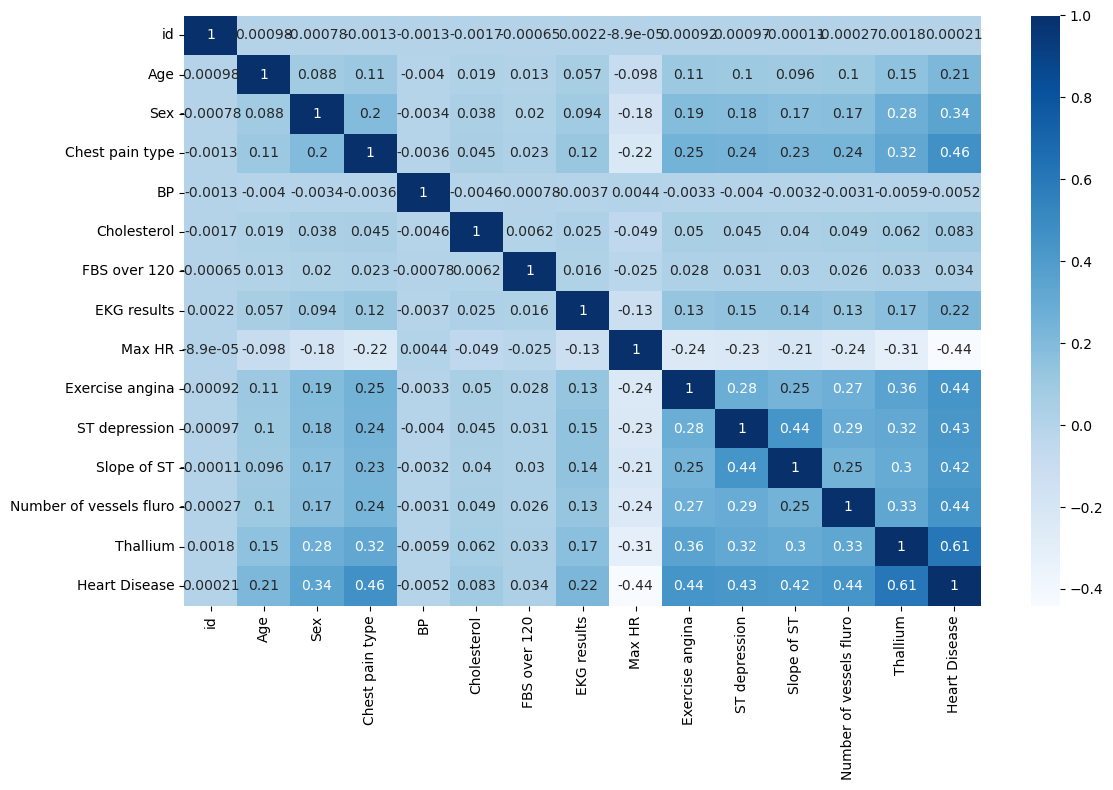

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
train_Corr=train.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(train_Corr,annot=True,cmap="Blues")
plt.tight_layout()
plt.show()

In [9]:
X = train.drop(["Heart Disease","id"], axis=1)
y= train["Heart Disease"]


In [10]:
def feature_engineering(df):

    df["Vessel_Thal"] = df["Number of vessels fluro"] * df["Thallium"]
    df["ST_Exercise"] = df["ST depression"] * df["Exercise angina"]
    df["ST_Slope"] = df["ST depression"] * df["Slope of ST"]
    df["Chest_Thal"] = df["Chest pain type"] * df["Thallium"]

    df["HR_inverse"] = 1 / (df["Max HR"] + 1)
    df["Age_HR"] = df["Age"] / (df["Max HR"] + 1)

    df["Ischemia_score"] = (
        df["ST depression"] +
        df["Exercise angina"] +
        df["Number of vessels fluro"] +
        df["Thallium"]
    )

    df["Age_ST"] = df["Age"] * df["ST depression"]
    df["Age_Vessels"] = df["Age"] * df["Number of vessels fluro"]

    df["High_ST"] = (df["ST depression"] > 2).astype("int8")
    df["Low_HR"] = (df["Max HR"] < 120).astype("int8")
    df["Multi_Vessel"] = (df["Number of vessels fluro"] >= 2).astype("int8")

    # ✅ SAFE BINNING FOR XGBOOST
    df["Age_bin"] = pd.cut(
        df["Age"], bins=[0, 40, 55, 70, 100], labels=False
    ).astype("int8")

    df["HR_bin"] = pd.qcut(
        df["Max HR"], q=4, labels=False
    ).astype("int8")

    return df


In [11]:
X  = feature_engineering(X)

In [12]:
X.nunique()

Age                          42
Sex                           2
Chest pain type               4
BP                           66
Cholesterol                 150
FBS over 120                  2
EKG results                   3
Max HR                       93
Exercise angina               2
ST depression                66
Slope of ST                   3
Number of vessels fluro       4
Thallium                      3
Vessel_Thal                   9
ST_Exercise                  66
ST_Slope                    139
Chest_Thal                   10
HR_inverse                   93
Age_HR                     3088
Ischemia_score              147
Age_ST                     1476
Age_Vessels                 114
High_ST                       2
Low_HR                        2
Multi_Vessel                  2
Age_bin                       4
HR_bin                        4
dtype: int64

In [13]:
cat_cols = [
    "Sex",
    "Chest pain type",
    "FBS over 120",
    "EKG results",
    "Exercise angina",
    "Slope of ST",
    "Number of vessels fluro",
    "Thallium"
]

for col in cat_cols:
    X[col] = X[col].astype("category")


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
from xgboost import XGBClassifier

xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "n_estimators": 1200,
    "learning_rate": 0.07,
    "max_depth": 3,
    "subsample": 0.95,
    "colsample_bytree": 0.95,
    "reg_lambda": 2,
    "enable_categorical": True,
    "random_state": 42,
    "early_stopping_rounds": 30  
}





In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

aucs = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = XGBClassifier(**xgb_params)

    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    preds = model.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, preds)

    aucs.append(auc)
    print(f"Fold {fold} AUC: {auc:.5f}")

print("\nMean AUC:", np.mean(aucs))


Fold 1 AUC: 0.95577
Fold 2 AUC: 0.95464
Fold 3 AUC: 0.95546
Fold 4 AUC: 0.95508
Fold 5 AUC: 0.95590

Mean AUC: 0.9553694547599404


In [17]:
final_params = xgb_params.copy()
final_params.pop("early_stopping_rounds")

final_model = XGBClassifier(**final_params)
final_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.95, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.07, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1200,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:

test_X = feature_engineering(test.drop(["id"], axis=1))
cat_cols = [
    "Sex",
    "Chest pain type",
    "FBS over 120",
    "EKG results",
    "Exercise angina",
    "Slope of ST",
    "Number of vessels fluro",
    "Thallium"
]

for col in cat_cols:
    X[col] = X[col].astype("category")
    test_X[col] = test_X[col].astype("category")



In [21]:
preds = final_model.predict_proba(test_X)[:,1]

sub["Heart Disease"] = preds
sub.to_csv("submission.csv", index=False)
